# 1. Introduction to Linear Algebra

## 1.1 Linear Algebra

Algebra is arithmetic that includes unknowns (non-numerical entities).
- The unknowns should be isolated to solve the equations. 

**What is Linear Algebra then...?**
- If there are exponential terms, it isn't linear algebra. 
    - ```2x ** 2 + 5 = 25```   Non-linear
    - ```2 * sqrt(x) + 5 = 25```  Non-linear

- Examples of solving for unknowns within system of linear equation:
    - Sheriff has 180 km/h car
    - Bank robber has 150 km/h car and five-minute head start.
    - How long does it take the sheriff to catch the robber?

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [ ]:
# d for distance

sheriff = 180/60
robber = 150/60

sheriff, robber

(3.0, 2.5)

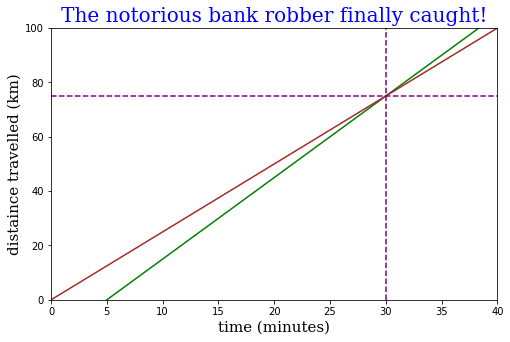

In [29]:
dict1 = {'family': 'serif', 'color': 'blue', 'size': 20}  
dict2 = {'family': 'serif', 'size': 15}

t = np.linspace(0, 40, 1000) # # start, finish, n points
sheriff_d = 3.0 * (t - 5)
robber_d = 2.5 * t

fig, ax = plt.subplots(figsize=(8, 5))
plt.title("The notorious bank robber finally caught!", fontdict=dict1)
plt.xlabel('time (minutes)', fontdict=dict2)
plt.ylabel('distaince travelled (km)', fontdict=dict2+)
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, sheriff_d, c='green')
ax.plot(t, robber_d, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

## 1.4 Historical and Contemporary Applications

Contemporary applications of LA
- Solving for unknowns in ML algorithms
- Dimensionality Reduction (PCA)
- Ranking results (eigen vector)
- Recommenders (Singular value decomposition, SVD)
- NLP (SVD, matrix factorisation)
    - Topic modeling
    - Semantic analysis

## 1.5 Exercise

Jill designs solar panels as a hobby. 
On April 1st, Jill's "Mark I" design begins generating powr: 1 kj/day. 
On May 1st, Jill's "Mark I" design begins generating powr: 4 kj/day.
- 1) What day does Mark II generation catch up with that of Mark I?
- 2) How much total energy have both generated by that day? 

In [46]:
def find_equal_production(num_days):
    
    prod1 = []
    prod2 = []

    days = np.arange(1, num_days + 1)

    for i in range(len(days)):
        prod1.append(days[i] + 30)
        prod2.append(days[i] * 4)
 
        if (prod1[i] == prod2[i]):
            print(f'1) Power generation equals on {len(prod1)} th day.')
            print(f'2) Total generation by each design: {prod1[i]} kj')
            break

find_equal_production(10)

1) Power generation equals on 10 th day.
2) Total generation by each design: 40 kj


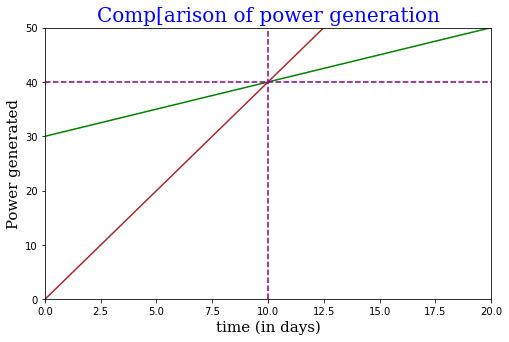

In [50]:
dict1 = {'family': 'serif', 'color': 'blue', 'size': 20}  
dict2 = {'family': 'serif', 'size': 15}

days = np.linspace(0, 50, 1000) # # start, finish, n points
mark1 = days + 30
mark2 = days * 4

fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Comparison of power generation", fontdict=dict1)
plt.xlabel('time (in days)', fontdict=dict2)
plt.ylabel('Power generated', fontdict=dict2)
ax.set_xlim([0, 20])
ax.set_ylim([0, 50])
ax.plot(days, mark1, c='green')
ax.plot(days, mark2, c='brown')
plt.axvline(x=10, color='purple', linestyle='--')
_ = plt.axhline(y=40, color='purple', linestyle='--')
plt.show()

# 2. Data Structures

## 2.1 Tensors

- scalar ```x```
- vector (1D) ```[x1, x2, x3, ... xn]```
- matrix (2D) ```[[x11, x12] [x21, x22]]```
- 3D-tensor ```[[[ ... ]]]```

-----------
- 0 scalar:          magnitude only
- 1 vector (1D):     array
- 2 matrix (2D):     flat table, square
- 3 3D-tensor:       3d table, cube
- n-tensor:          higher dimensional 

In [28]:
x = torch.tensor(25) # type specification is optional. e.g.: type=torch.float16

print(x)        # tensor(25) 
print(x.shape)  # torch.Size([])  - No dimensionality

tensor(25)
torch.Size([])


## 2.2 Scalars

- No dimensions
- Single number
- int, float32, ...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 2.3 Vectors and Vector Transposition 

In [61]:
x = np.array([[25, 2, 5], [1, 3, 5]]) # type argument is optional, e.g.: dtype=np.float16
print(x)
x = x.T 
x

[[25  2  5]
 [ 1  3  5]]


array([[25,  1],
       [ 2,  3],
       [ 5,  5]])

## 2.4 Norms and Unit Vectors
- Vectors represent a magnitude and direction from origin.
    - ```[x1, x2] = [12, 4]```
- **Norms** are functions that quantify vector magnitude.
    - L ** 2 Norm ```||x||2 = sqrt(∑xn ** 2)```
    - Measures simple (Euclidean) distance from origin.
    - Most common norm in machine leraning 
        - Instaed of ```||x||2```, it can be denoted as ```||x||```


### Unit vector
- Sepcail case of vector where its length is equal to one. 
- Technically, x is a unit vector with unit norm. ```||x|| = 1```
- Returns the absolute value of the largest-magnitude element. 

### Norms

#### L2 norm

In [64]:
x = torch.tensor([25, 2, 5])
print(x)

(25**2 + 2**2 + 5**2) ** (1/2)  # 25.573423705088842 = Uclidean distance from the origin. 

tensor([25,  2,  5])


25.573423705088842

In [65]:
# Alternatively:
np.linalg.norm(x)

25.573423705088842

#### L1 norm
- ```||x||1 = (∑|x_n|)```
- Sum of all the absoulte values of x_n.
- Another common ML norm. 
- Varies linearly at all locationos whether near or far from the origin. 
- Used whenever difference between zero and non-zero is key. 

In [67]:
# L1
l1_elements = []

for e in x:
    l1_elements.append(np.abs(e))

sum(l1_elements)

tensor(32)

#### Squared L2 Norm
- ```||x||2 = ∑x ** 2 ```
- Computationally cheaper to use than L2 norm because:
    - Squared L2 norm equals simply xT * x.
    - In ML, derivative is used a lot.
    - Derivative (used to train many ML algorithms) of element x requires only that individual element, whereas L2 norm requires the entire x vector.
- Downside: it grows slowly near origin (of course, if you use derivative...?). It can't be used if distinction between 0 and near-0 is important. 

In [69]:
def l2_norm(x):
    l2s = []
    for e in x:
        l2s.append(e**2)
    return sum(l2s)

l2_norm(x)

tensor(654)

In [70]:
np.dot(x, x)

654

#### Max Norm (L∞ norm)
- ```||x||∞ = max|x_i|```*italicised text*

In [77]:
def max_norm(x):
    maxs = []
    for e in x:
        maxs.append(np.abs(e))
    return np.max(maxs)

max_norm(x)

25

#### Generalised Lp Norm
- ```||x||p = (∑|x_i|**p)**(1/p)```
    - absolute value of x_i to the power of p. 
    - sum of all x_i's to p power
    - then raised to the power of (1/p)
- p must be:
    - a real number
    - p >= 1. 
        - this meaning the final value of ```||x||p``` will be at best the sum itself (p = 1) or smaller than the sum (p > 1, this puts the final value under the n-th square root.)
- Can derive L1, L2, and L∞ norm formulae by substituting for p.
- **Norms, particularly L1 and L2** are used to regularise objective functions. 
    - Help us regularise ML models that are trained on train set data. After regularisation, the models should work well on untrained dataset.
    - (is be because we know the regularised Euclidean distance of the train set?)


## 2.5 Basis, Orthogonal, and Orthonormal Vectors
**Basis Vectors** 
- ```i (i, 0)```
- ```j (0, 1)```
- e.g. v = 1.5i + 2j
- can be scaled to represent any vector in a given vector space. 
- typically use unit vectors along axes of vector space. 

**Orthogonal Vectors** 
- x and y are orthogonal vectors if xTy = 0
- orthogonal if they are perpendicular to each other (90 degree angle), (assuming non-zero norms)
- n-dimensional space has max n mutually-orthogonal vectors (assuming non-zero norms).
- **Ortho-normal Vectors** are orthogonal and all have unit form. 
    - e.g.) basis vectors. 

In [78]:
i = np.array([1, 0])
j = np.array([0, 1])

In [79]:
np.dot(i, j)

0

## 2.6 Matrices
- 2D array
- Height given priority ahead of width in notation (n_row, n_col)
    - X with three rows and two columns = (3, 2)


#### In NumPy

In [82]:
# Use array() with nested brackets: 
X = np.array([[25, 2], [5, 26], [3, 7]])
X, X.shape, X.size

(array([[25,  2],
        [ 5, 26],
        [ 3,  7]]), (3, 2), 6)

In [85]:
# Select left column of matrix X (zero-indexed)
X[:, 0]

array([25,  5,  3])

In [86]:
# Select middle row of matrix X: 
X[1, :]

array([ 5, 26])

In [88]:
# Another slicing-by-index example:
X[1:3, 0:2]

array([[ 5, 26],
       [ 3,  7]])

#### In PyTorch

In [89]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [90]:
X_pt.shape

torch.Size([3, 2])

In [91]:
X_pt[1, :]

tensor([ 5, 26])

In [93]:
X_pt[1, :]

tensor([ 5, 26])

## 2.7 Generic Tensor Notation

As an example, rank 4 tensors are common for images, where each dimension corresponds to:

1. Number of images in training batch, e.g., 32
2. Image height in pixels, e.g., 28 for MNIST digits
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [ ]:
images_pt = torch.zeros([32, 28, 28, 3])
images_pt

In [ ]:
images_tf = tf.zeros([32, 28, 28, 3])
images_tf

# Exercises


In [111]:
# 1. transpose. 
v = torch.tensor([[25], [2], [-3], [-23]])
v.shape

torch.Size([4, 1])

In [115]:
v = v.T
print(v, v.shape)

tensor([[ 25,   2,  -3, -23]]) torch.Size([1, 4])


In [109]:
# 2. dimensions of matrix Y
Y = torch.tensor([[42, 4, 7, 99], [+-99, -3, 17, 22]])
Y

tensor([[ 42,   4,   7,  99],
        [-99,  -3,  17,  22]])

In [110]:
Y.shape

torch.Size([2, 4])

In [116]:
# element position in Y for 17
Y[1, 2]

tensor(17)